Допустим линию для регрессии можно построить с помощью уравнения y=mx+b, где m-это весы модели, а b - bias (склон)

Мы знаем X, тогда, мы можем найти m и b

m = (x.mean() * y.mean() - (x*y).mean()) / x.mean()**2 - x**2.mean()

In [1]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random

Создадим подобие X

In [2]:
xs = np.array([1, 2, 3, 4, 5, 6], dtype=np.float64) #здесь признак
 
ys = np.array([5, 4, 6, 5, 6 , 7], dtype=np.float64) #здесь лейбл 

def best_fit_slope_and_intercept(xs, ys):
    m = ( ((mean(xs) * mean(ys)) - mean(xs*ys)) /
         ((mean(xs) * mean(xs) - mean(xs*xs))))
    b = mean(ys) - m*mean(xs)
    return m, b

Посмотрим на данные:

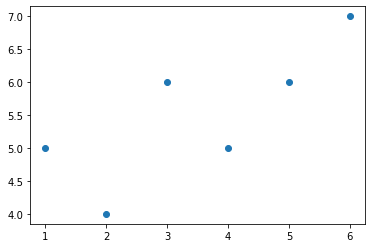

In [3]:
plt.scatter(xs, ys)
plt.show()

In [4]:
m, b = best_fit_slope_and_intercept(xs, ys)

Найдем линию, которая делит данные

In [5]:
regression_line = [(m*x)+b for x in xs ]

Соединим график с точками и линию

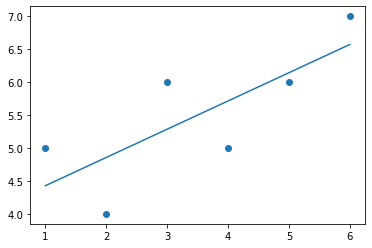

In [6]:
plt.scatter(xs, ys)
plt.plot(xs, regression_line)
plt.show()

Сделаем предикт

In [7]:
predict_x = 8 #у сэмпла признак равен 8

predict_y = (m * predict_x) + b #узнаем значение для такого x

Построим график, увидим где точка 

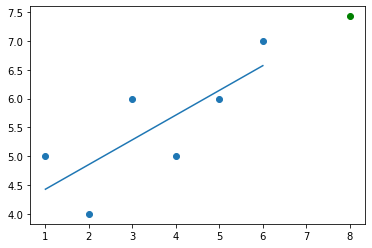

In [8]:
plt.scatter(xs, ys)
plt.scatter(predict_x, predict_y, color = 'g')
plt.plot(xs, regression_line)
plt.show()

Мы построили модель, теперь нам нужно узнать насколько она хороша?

Для этого мы используем метрику r^2

Метрика вычисляет ошибку - расстрояние между точко и линией, проще говоря

Мы возводим расстояние между точкой и линией в квадрат, чтобы убрать отрицательные значение, а также, чем больше расстояние, тем больше будет ошибка (т.к. происходит возведение в квадрат)

Мы хотим наказывать модель за то, что точки далеко от линии, но почему тогда не используем ^4 или ^8. Вообще, мы можем их использовать.

r^2 = 1 - SquaredError(y_pred) / SquaredError(y.mean())

Допустим r^2 = 0.8. Это хорошо?

Мы можем получить такое значение, только если SquaredError(y_pred) / SquaredError(y.mean()) = 0.2

А мы получить SquaredError(y_pred) / SquaredError(y.mean()) = 0.2, когда

SquaredError(y_pred) = 2 и SquaredError(y.mean()) = 10

Ошибка в предсказании меньше средней ошибки и это достаточно хорошо, это значит что данные достаточно линейные.

Здесь мы проверяем насколько лучше получилась линия, чем если бы мы сделалии линию из среднего расстояния 

Поэтому мы хотим, чтобы r^2 был как можно выше. 

In [9]:
def squared_error(ys_orig, ys_line):
    return sum((ys_line - ys_orig)**2)

def coefficient_of_determination(ys_orig, ys_line):
    
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr / squared_error_y_mean)

In [10]:
r_squared = coefficient_of_determination(ys, regression_line)

In [11]:
r_squared

0.5844155844155845

Сделаем линию из средних

Красным - линия из средних, синим - линия регрессии

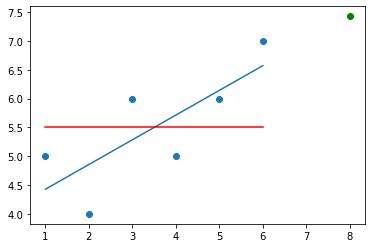

In [12]:
plt.scatter(xs, ys)
plt.scatter(predict_x, predict_y, color = 'g')
plt.plot(xs, regression_line)
plt.plot(xs, [mean(ys) for y in ys], color='r')
plt.show()

Расширим датасет:

Создадим функцию, которая создает новый датасет с нужными параметрами

In [13]:
def create_dataset(hm, variance, step=2, correlation=False):
    #hm - сколько сэмплов
    #variance - how variant we want dataset to be
    #step - на сколько обычно уходит y значение от предыдущего значения
    #correlation - корреляция негативная или позитивная 
    val = 1 #просто число
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance, variance) #val + случайное число из диапозона
        ys.append(y)
        if correlation and correlation == 'pos':
            val += step
        elif correlation and correlation == 'neg':
            val -= step
    xs = [i for i in range(len(ys))]
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)

In [14]:
xs, ys = create_dataset(40, 40, 2, correlation = 'pos')

Переобучим модель:

In [15]:
m, b = best_fit_slope_and_intercept(xs, ys)
regression_line = [(m*x)+b for x in xs ]

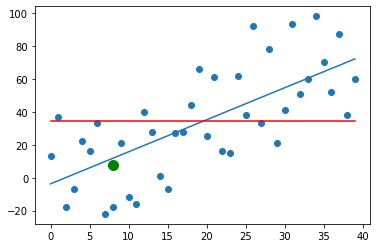

In [16]:
plt.scatter(xs, ys)
plt.scatter(predict_x, predict_y, color = 'g', s = 100) #точка с саммы первым предсказанием, s = size
plt.plot(xs, regression_line)
plt.plot(xs, [mean(ys) for y in ys], color='r')
plt.show()

In [17]:
r_squared = coefficient_of_determination(ys, regression_line)
r_squared

0.4862596849759159

- Посмотрим что будет, если сделать меньше variance при создании датафрейма

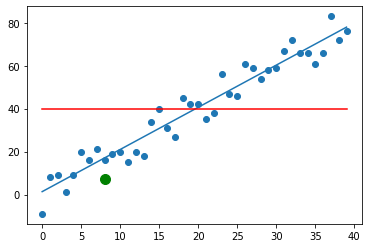

0.9383337477682463

In [18]:
xs, ys = create_dataset(40, 10, 2, correlation = 'pos')
m, b = best_fit_slope_and_intercept(xs, ys)
regression_line = [(m*x)+b for x in xs ]
plt.scatter(xs, ys)
plt.scatter(predict_x, predict_y, color = 'g', s = 100) #точка с саммы первым предсказанием, s = size
plt.plot(xs, regression_line)
plt.plot(xs, [mean(ys) for y in ys], color='r')
plt.show()
r_squared = coefficient_of_determination(ys, regression_line)
r_squared

r^2 стал намного выше, т.к. растояние между точками стало меньше и поэтому легче проверсти линию

- Посмотрим что будет, если сделать variance выше

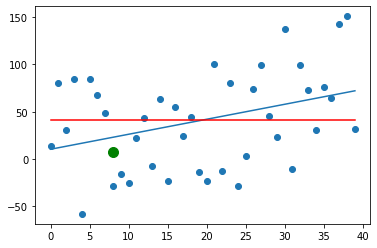

0.12856833555814884

In [19]:
xs, ys = create_dataset(40, 80, 2, correlation = 'pos')
m, b = best_fit_slope_and_intercept(xs, ys)
regression_line = [(m*x)+b for x in xs ]
plt.scatter(xs, ys)
plt.scatter(predict_x, predict_y, color = 'g', s = 100) #точка с саммы первым предсказанием, s = size
plt.plot(xs, regression_line)
plt.plot(xs, [mean(ys) for y in ys], color='r')
plt.show()
r_squared = coefficient_of_determination(ys, regression_line)
r_squared

И что будет если сделать отрицательную корреляцию:

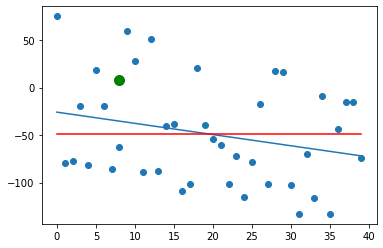

0.06406366040992839

In [20]:
xs, ys = create_dataset(40, 80, 2, correlation = 'neg')
m, b = best_fit_slope_and_intercept(xs, ys)
regression_line = [(m*x)+b for x in xs ]
plt.scatter(xs, ys)
plt.scatter(predict_x, predict_y, color = 'g', s = 100) #точка с саммы первым предсказанием, s = size
plt.plot(xs, regression_line)
plt.plot(xs, [mean(ys) for y in ys], color='r')
plt.show()
r_squared = coefficient_of_determination(ys, regression_line)
r_squared

Линия начала смотреть в другую сторону